1.Метод k ближайших соседей.
Сгенерируем обучающую выборку из описанный двумя признаками объектов нескольких классов.

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors 

import numpy as np

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
classification_problem = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [5]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

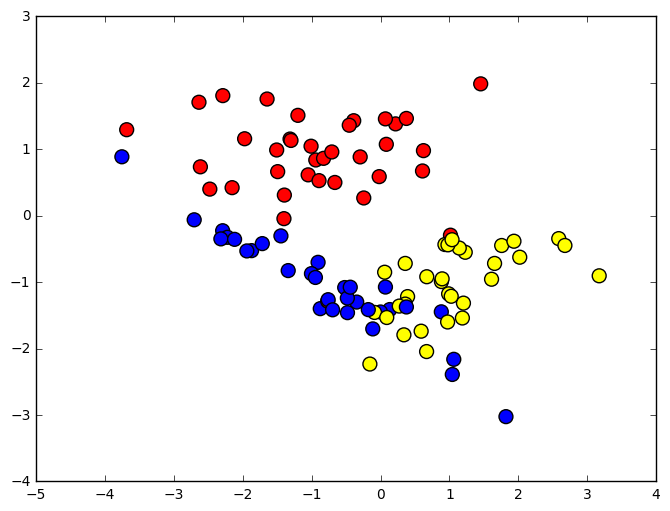

In [6]:
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)

In [7]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [8]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.8666666666666667

In [10]:
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2,
       0, 0, 0, 1, 2, 2, 0])

In [11]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [16]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

Визуализируем разделяющие поверхности, получаемые при решении задачи классификации методом k ближайших соседей для разных k. k=1,3,5,7,9,11,17,37,53,67

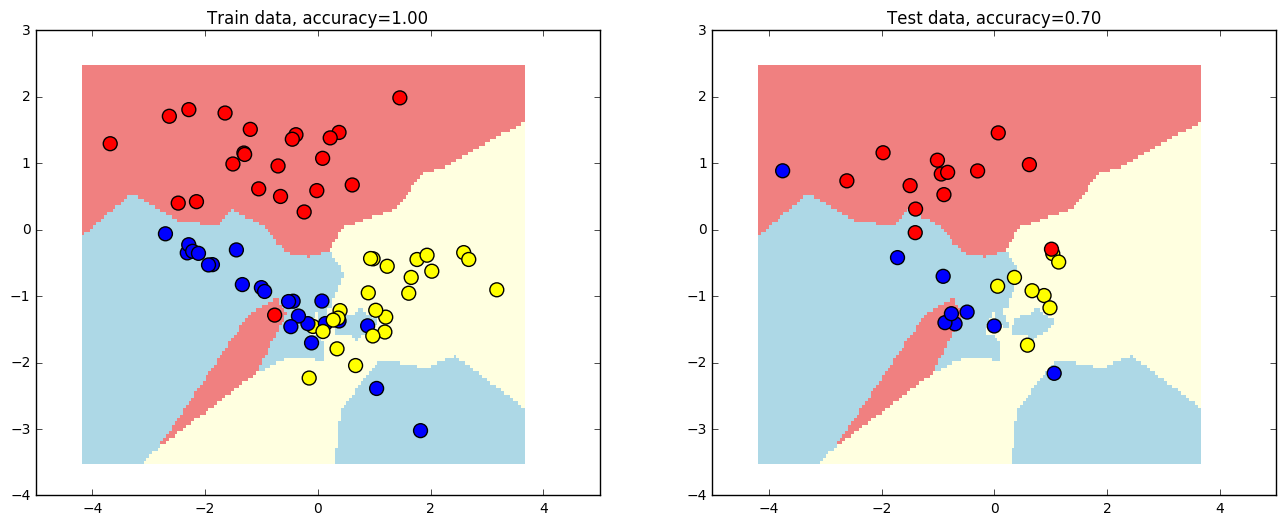

In [13]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

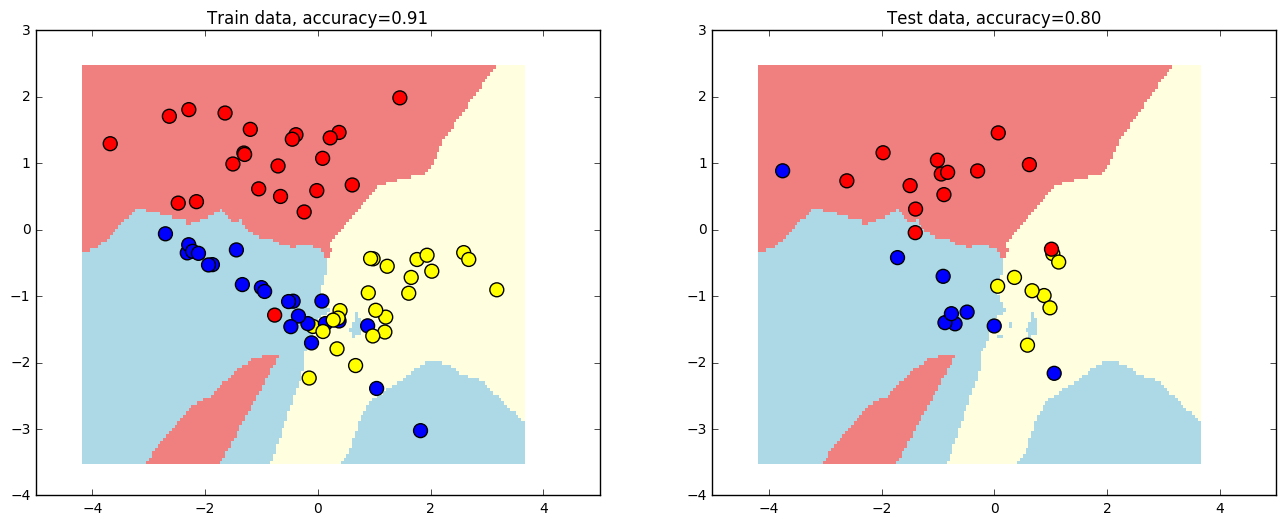

In [18]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

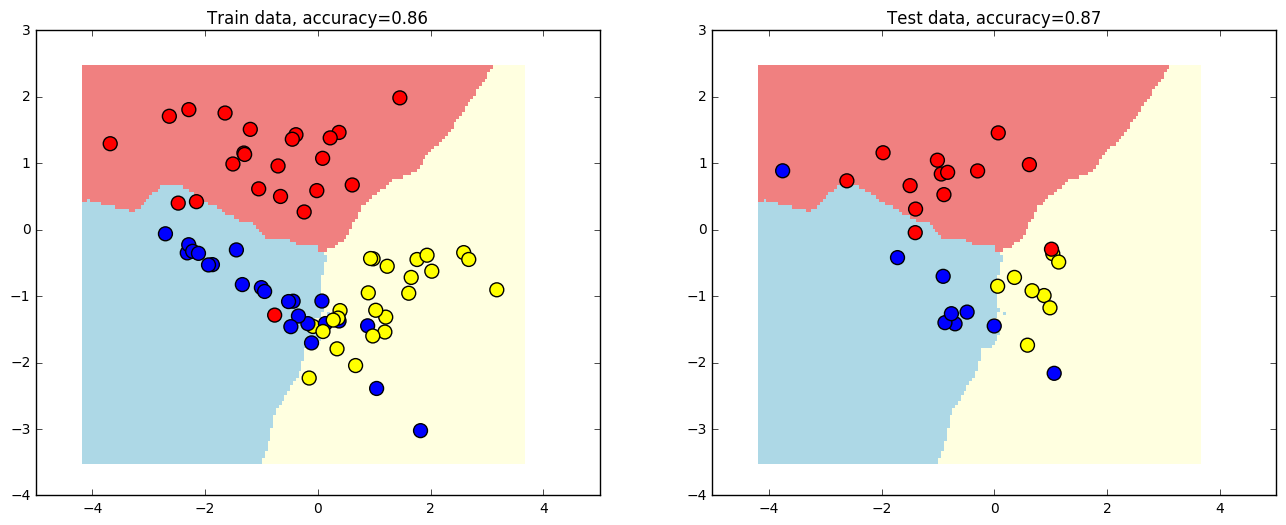

In [26]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

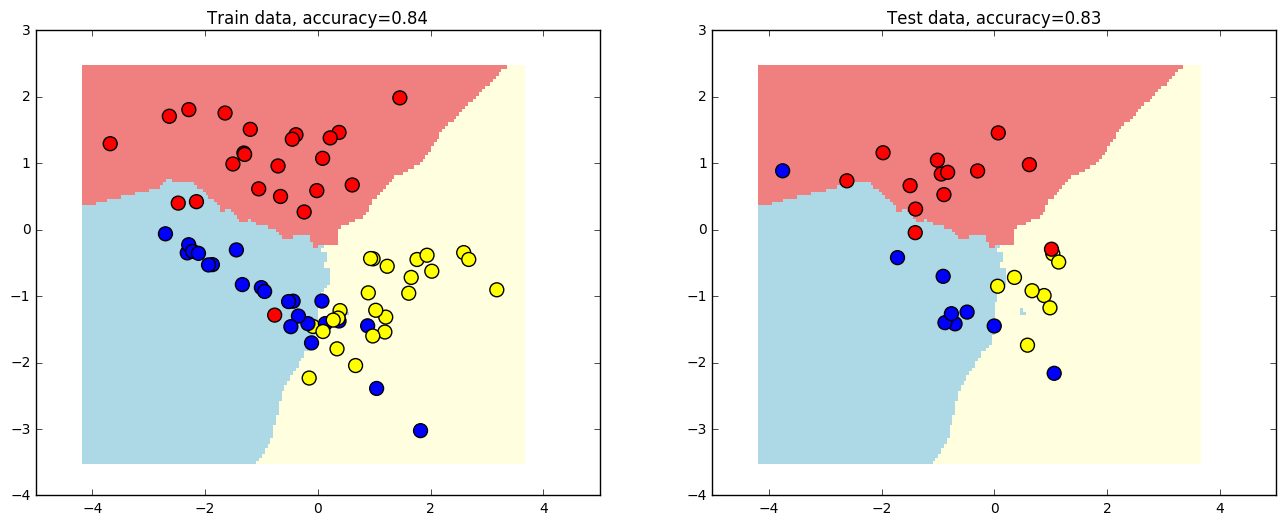

In [27]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=7)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

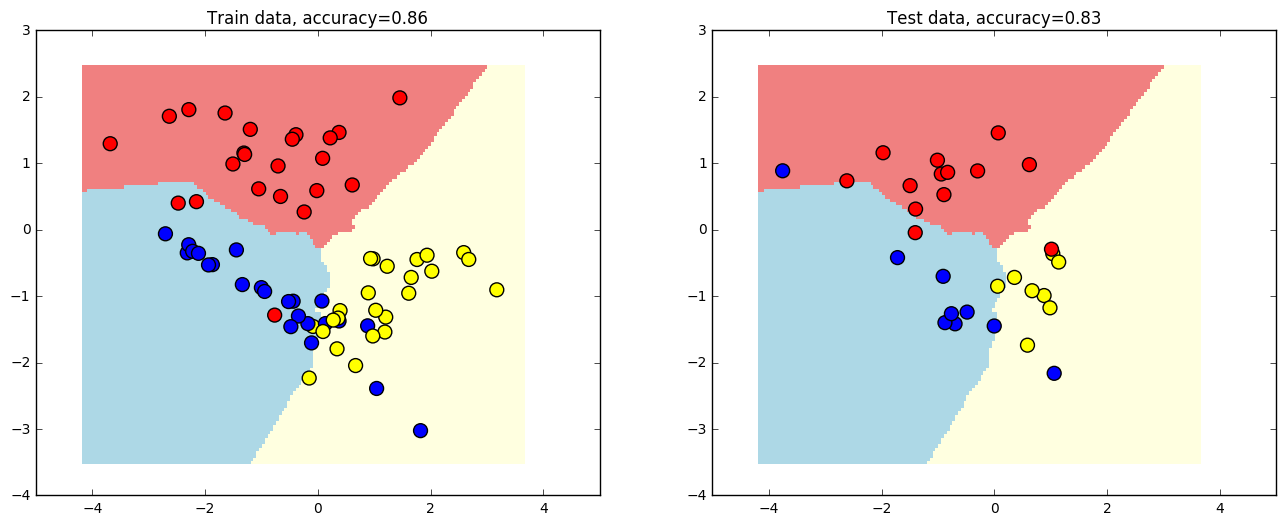

In [28]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=9)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

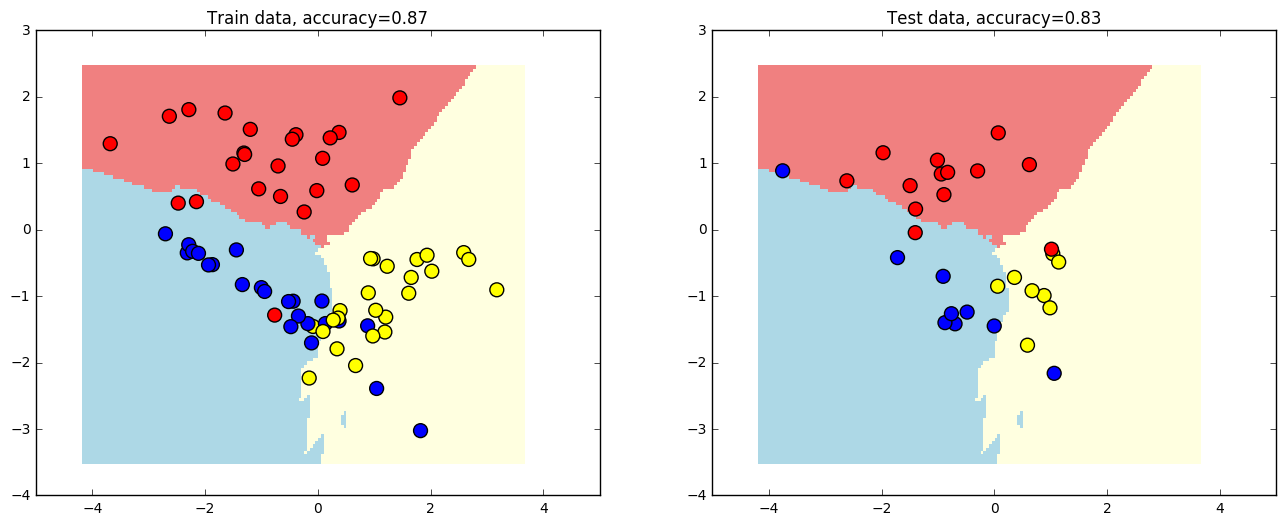

In [20]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=11)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

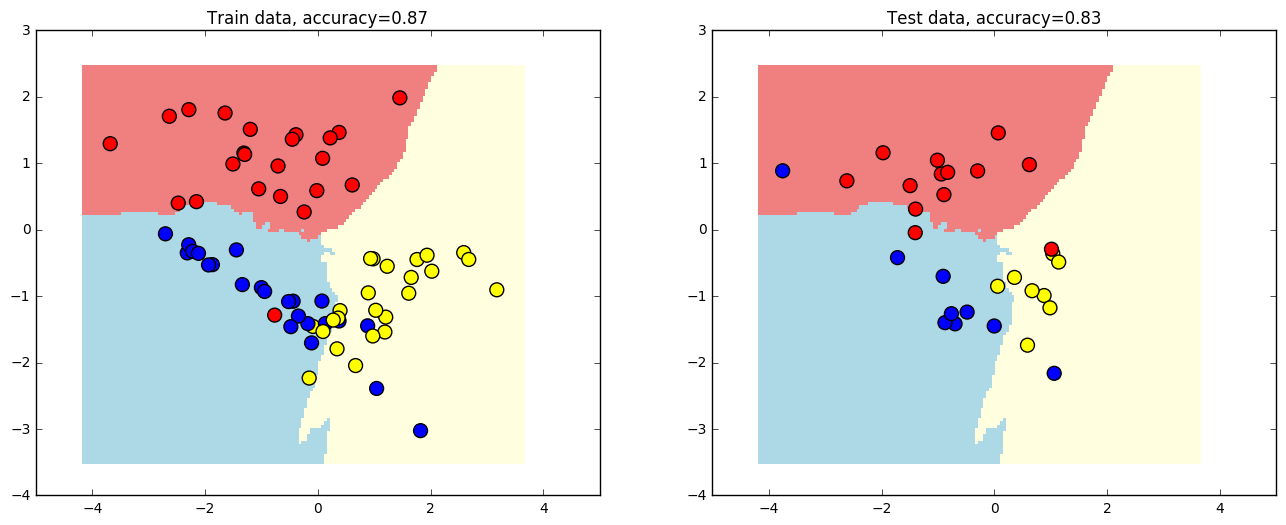

In [21]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=17)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

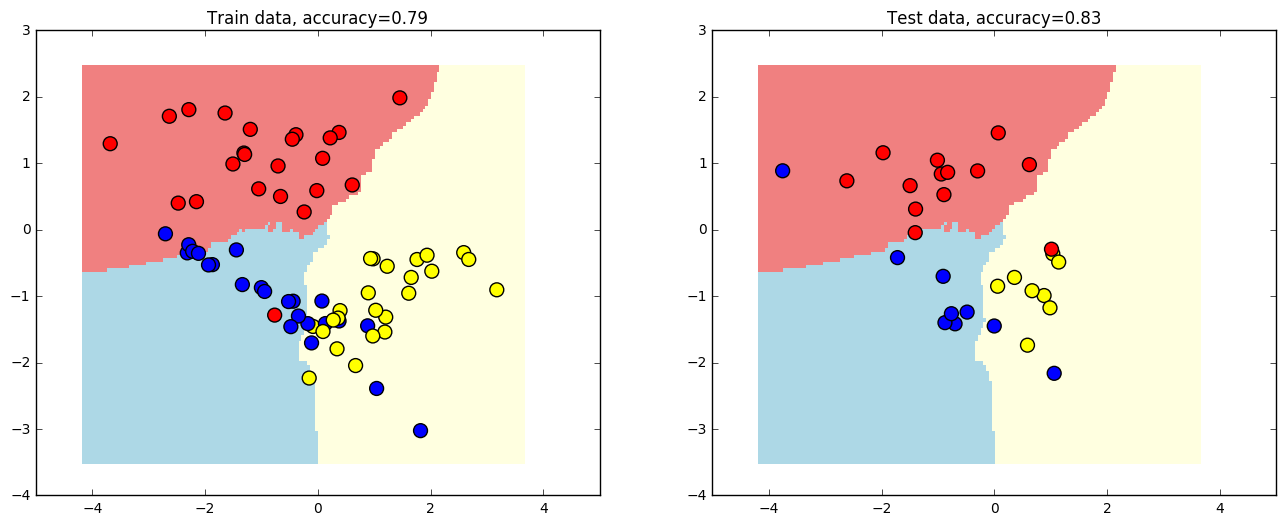

In [22]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=37)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

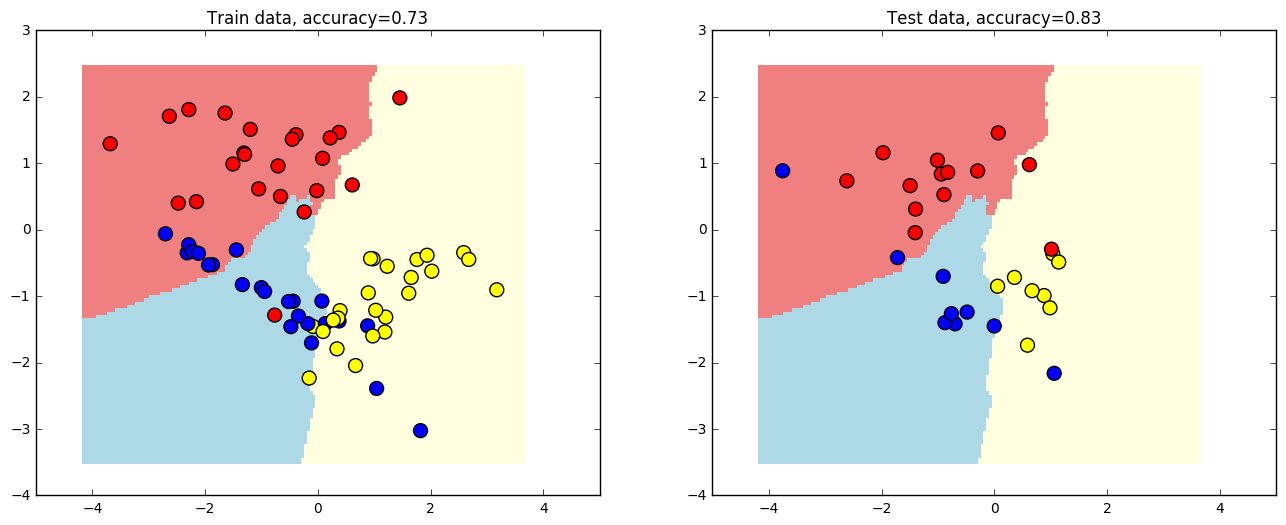

In [23]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=53)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

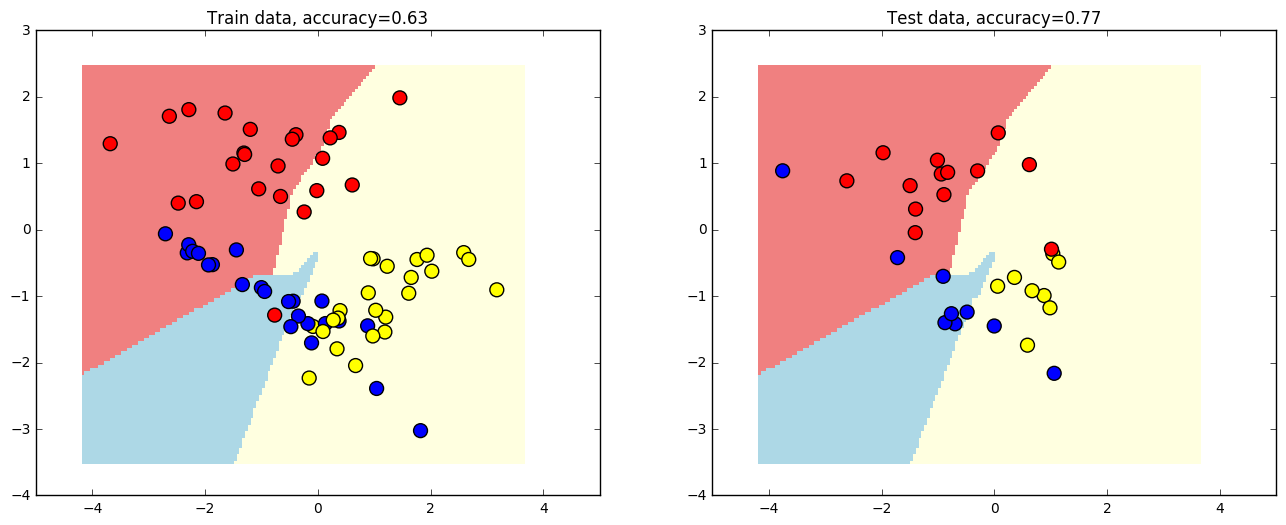

In [25]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=67)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

Построим график зависимости точности от k-количества рассматриваемых соседей по точкам, полученным в ходе варьирования k

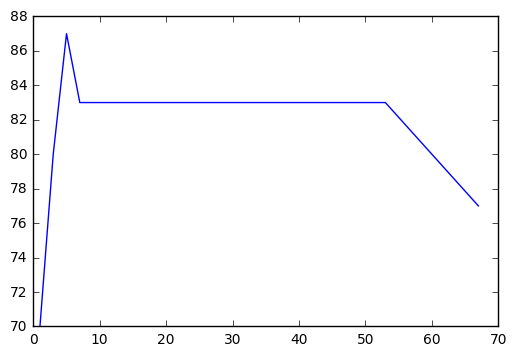

In [31]:
import matplotlib.pyplot as plt
xlist = [1,3,5,7,9,11,17,37,53,67]
ylist = [70,80,87,83,83,83,83,83,83,77]
pylab.plot (xlist, ylist)
pylab.show()

Как мы видим, для большей точности количество соседей должно быть небольшим относительно размеров выборки, до десяти, однако, 1/3 соседа не позволяют получить действительную информацию о принадлежности точки к определённому классу.  